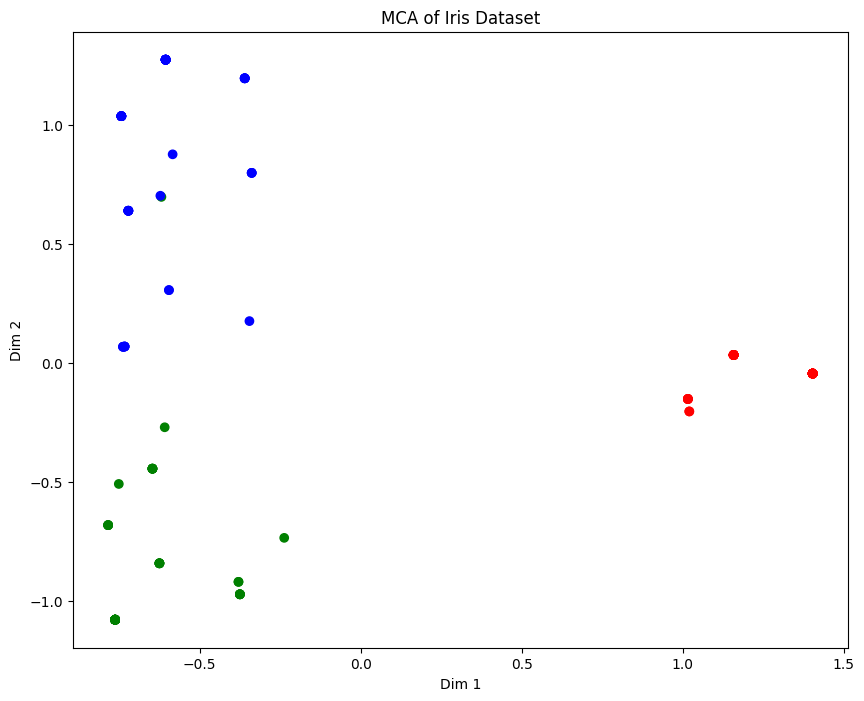

In [ ]:
### EJERICICIO 2


# Instalar la biblioteca prince si no está instalada
!pip install prince

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import prince
import matplotlib.pyplot as plt

# Cargar los datos de Iris
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Convertir las variables continuas en categorías (binarización)
df['sepal length (cm)'] = pd.qcut(df['sepal length (cm)'], 3, labels=["corto", "medio", "largo"])
df['sepal width (cm)'] = pd.qcut(df['sepal width (cm)'], 3, labels=["estrecho", "medio", "ancho"])
df['petal length (cm)'] = pd.qcut(df['petal length (cm)'], 3, labels=["corto", "medio", "largo"])
df['petal width (cm)'] = pd.qcut(df['petal width (cm)'], 3, labels=["estrecho", "medio", "ancho"])

# Convertir species a categorías
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Realizar el ACM
mca = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
mca = mca.fit(df)

# Extraer las coordenadas
mca_coords = mca.row_coordinates(df)

# Graficar los resultados manualmente
plt.figure(figsize=(10, 8))
plt.scatter(mca_coords[0], mca_coords[1], c=df['species'].map({'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}))
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('MCA of Iris Dataset')
plt.show()


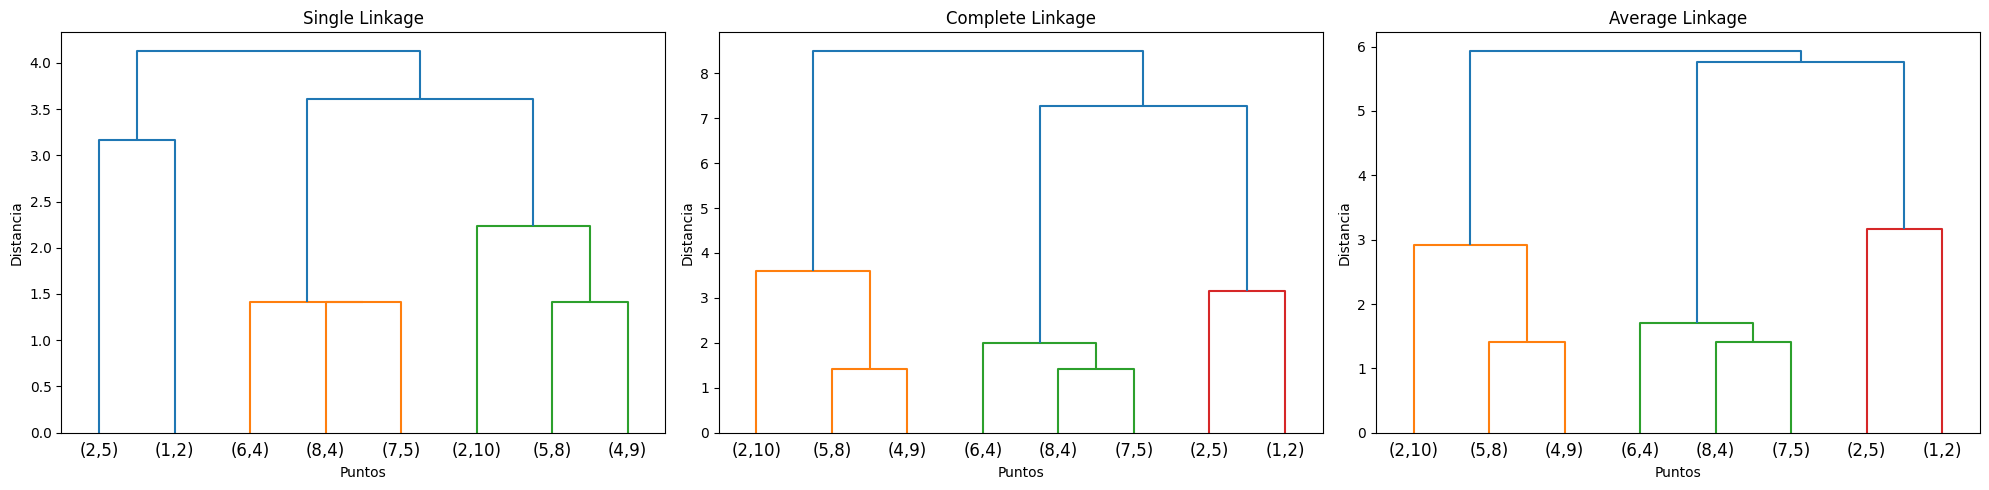

In [ ]:
## EJERCICIO 9.2
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Definir los puntos
points = np.array([
    [2, 10], [2, 5], [8, 4], [5, 8],
    [7, 5], [6, 4], [1, 2], [4, 9]
])

# Calcular las distancias y aplicar cada método de enlace
linkage_methods = ['single', 'complete', 'average']

# Generar dendrogramas
plt.figure(figsize=(20, 5))

for i, method in enumerate(linkage_methods):
    plt.subplot(1, 3, i+1)
    Z = linkage(points, method=method)
    dendrogram(Z, labels=[f'({x},{y})' for x, y in points])
    plt.title(f'{method.capitalize()} Linkage')
    plt.xlabel('Puntos')
    plt.ylabel('Distancia')

plt.tight_layout()
plt.show()
